In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

df = pd.read_csv("data_impt_train.csv")

print("First rows of the dataset:")
print(df.head())

print(f"\n Dataset shape: {df.shape}")

print("\n Dataset column info:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\n Number of missing values per column:")
print(missing_values[missing_values > 0])

# Basic statistical summary
print("\n Statistical summary of the dataset:")
print(df.describe())


First rows of the dataset:
   TIME_PERIOD  GEO_PICT  TOPIC  CONDITION  VIOLENCE_TYPE  ACTUALITY  OUTCOME  \
0       2013.0       0.0   10.0        0.0            9.0        0.0     13.0   
1       2013.0       0.0   10.0        0.0            9.0        1.0     13.0   
2       2013.0       0.0   10.0        0.0           10.0        0.0     13.0   
3       2013.0       0.0   10.0        0.0           10.0        0.0     15.0   
4       2013.0       0.0   10.0        0.0           10.0        1.0     12.0   

   OBS_VALUE  DATA_SOURCE  OBS_COMMENT  
0        0.0          1.0         15.0  
1       39.6          1.0         15.0  
2        5.7          1.0         15.0  
3        1.4          1.0         15.0  
4       21.6          1.0         15.0  

 Dataset shape: (544, 10)

 Dataset column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----


 Distribution of OUTCOME variable:
OUTCOME
13.0    96
15.0    32
21.0    32
16.0    32
0.0     32
11.0    16
17.0    16
5.0     16
4.0     16
3.0     16
2.0     16
1.0     16
8.0     16
24.0    16
14.0    16
7.0     16
12.0    16
9.0     16
10.0    16
23.0    16
22.0    16
20.0    16
19.0    16
18.0    16
6.0     16
Name: count, dtype: int64


<ipython-input-7-7c9fdd18111a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="viridis")


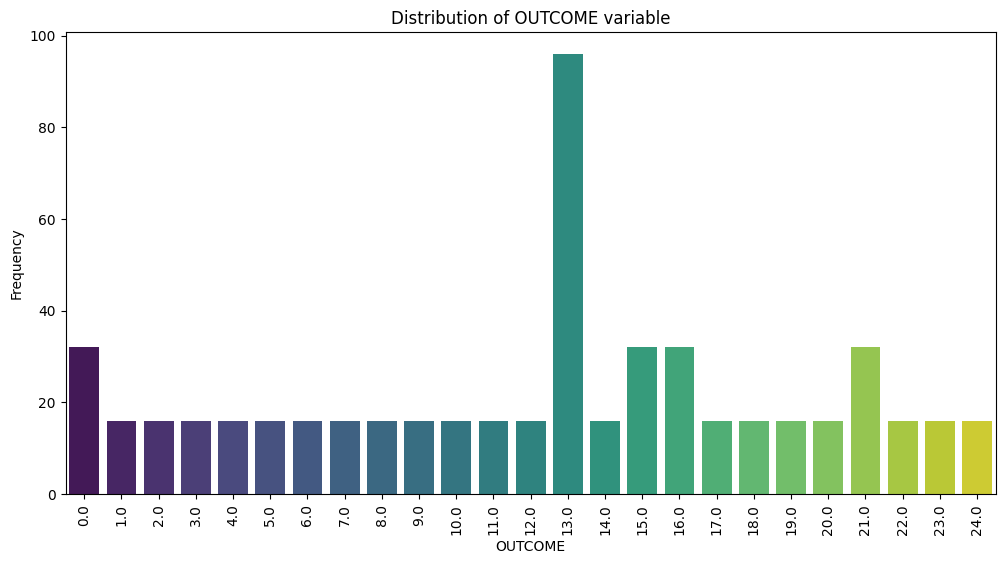

In [7]:
# Compute the distribution of the target variable
outcome_counts = df["OUTCOME"].value_counts()

print("\n Distribution of OUTCOME variable:")
print(outcome_counts)

# Visualize the distribution
plt.figure(figsize=(12,6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of OUTCOME variable")
plt.xlabel("OUTCOME")
plt.ylabel("Frequency")
plt.show()


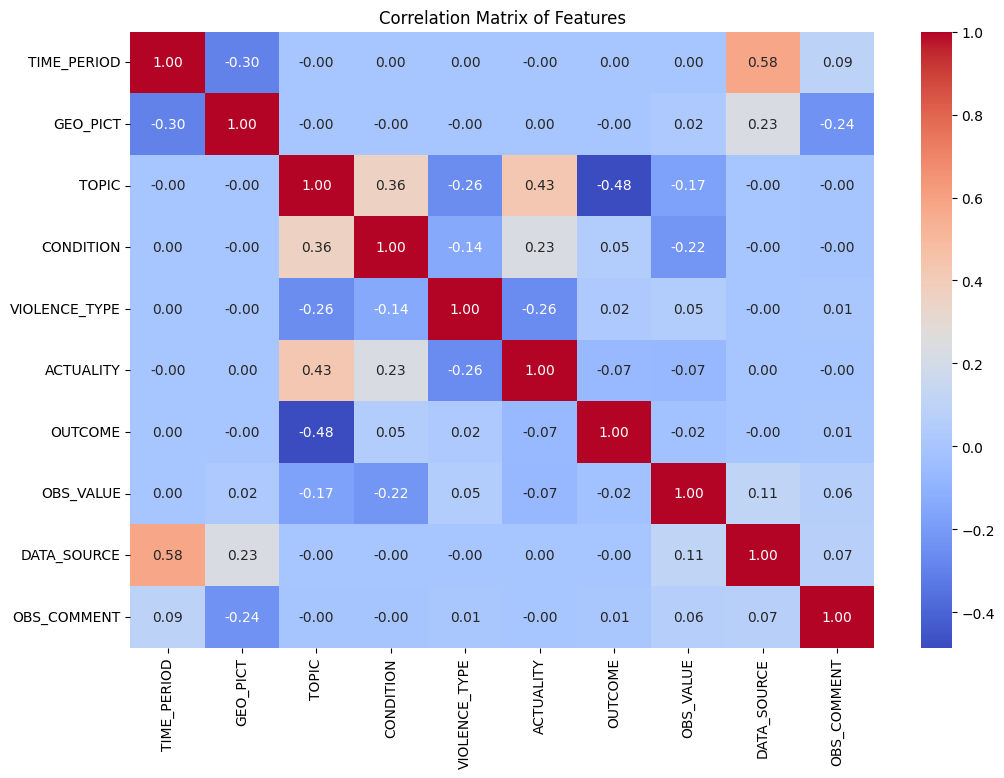


 Features with the highest correlation to OUTCOME:
OUTCOME          1.000000e+00
CONDITION        4.891321e-02
VIOLENCE_TYPE    2.386890e-02
OBS_COMMENT      5.368594e-03
TIME_PERIOD      4.847720e-15
DATA_SOURCE     -1.655026e-16
GEO_PICT        -7.209211e-16
OBS_VALUE       -2.276770e-02
ACTUALITY       -6.674933e-02
TOPIC           -4.845039e-01
Name: OUTCOME, dtype: float64


In [8]:
# Convert categorical variables to numerical for correlation analysis
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col], _ = pd.factorize(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Identify variables most correlated with OUTCOME
correlation_with_outcome = correlation_matrix["OUTCOME"].sort_values(ascending=False)
print("\n Features with the highest correlation to OUTCOME:")
print(correlation_with_outcome)


In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
significant_features = []

print("\n Chi² Test for Categorical Variables:")
for col in categorical_cols:
    if col != "OUTCOME":
        contingency_table = pd.crosstab(df[col], df["OUTCOME"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"\n {col}: p-value = {p:.5f}")
        if p < 0.05:
            significant_features.append(col)
            print("Significant correlation with OUTCOME")
        else:
            print("No significant correlation")

print("\n Categorical features significantly correlated with OUTCOME:", significant_features)



 Chi² Test for Categorical Variables:

 Categorical features significantly correlated with OUTCOME: []


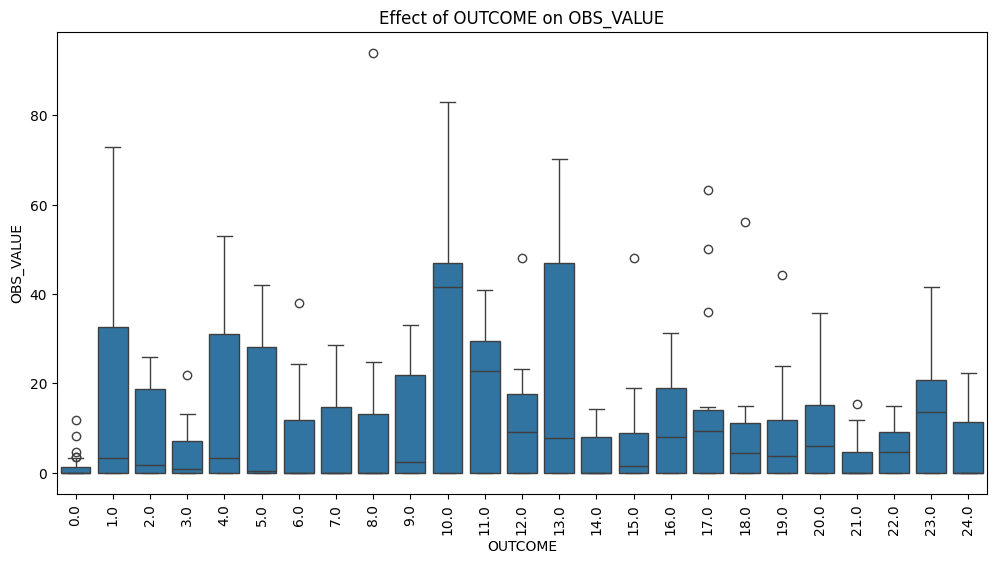

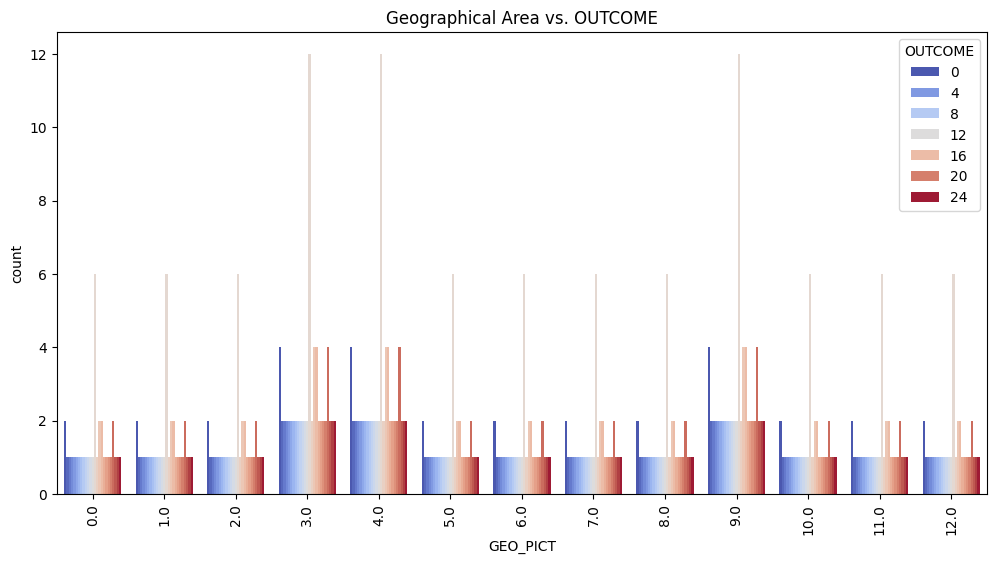

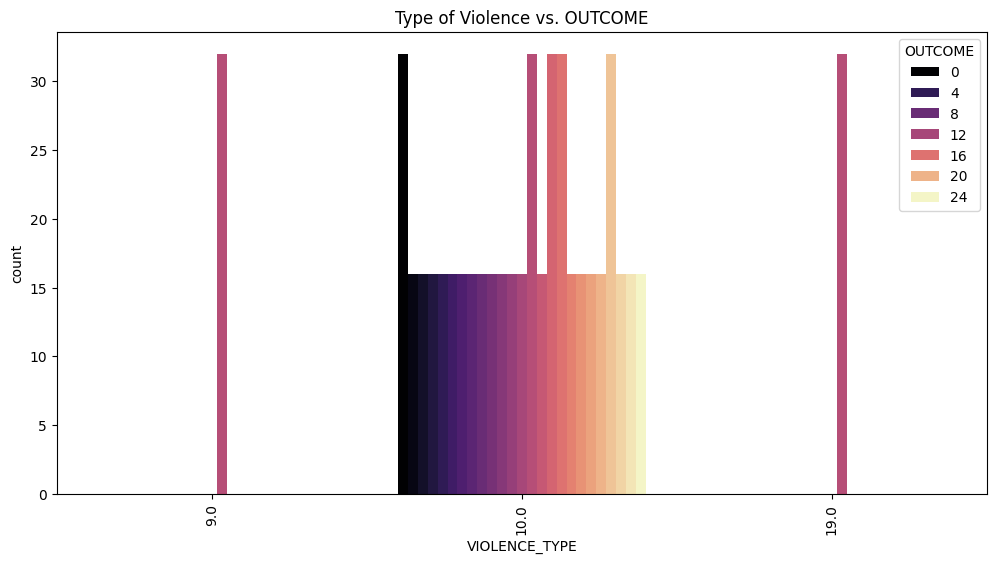

In [10]:
# Distribution of OBS_VALUE across different OUTCOME categories
plt.figure(figsize=(12,6))
sns.boxplot(x="OUTCOME", y="OBS_VALUE", data=df)
plt.xticks(rotation=90)
plt.title("Effect of OUTCOME on OBS_VALUE")
plt.show()

# Distribution of GEO_PICT across different OUTCOME categories
plt.figure(figsize=(12,6))
sns.countplot(x="GEO_PICT", hue="OUTCOME", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Geographical Area vs. OUTCOME")
plt.show()

# Distribution of VIOLENCE_TYPE across different OUTCOME categories
plt.figure(figsize=(12,6))
sns.countplot(x="VIOLENCE_TYPE", hue="OUTCOME", data=df, palette="magma")
plt.xticks(rotation=90)
plt.title("Type of Violence vs. OUTCOME")
plt.show()
